#  Modelo de ZeeHB

Sample of notebook for specific model

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import os, sys, inspect
import commands
from hep import *

In [3]:
def func(k, M1, M2, MAo, Mho, MHo, v, lam2, lam6, lam7, lam9, lam10, lamh, Muh, Mu2):
    M12 = M1*M1; M22 = M2*M2; MAo2 = MAo*MAo; Mho2 = Mho*Mho; MHo2 = MHo*MHo; Mu22 = Mu2*Mu2; Muh2 = Muh*Muh 
    phi = 0.5*np.arcsin((4*np.pi)**2*k/(np.log(M22/M12)))
    Mu  = (M22-M12)*np.sin(2.0*phi)/(np.sqrt(2)*v)
    MH2 = M12*(np.sin(phi))**2+M22*(np.cos(phi))**2
    M332 = M12*(np.cos(phi))**2+M22*(np.sin(phi))**2
    lam1 = 0.5*(MHo2+Mho2-np.sqrt((MHo2-Mho2)**2-4.0*v**4*lam6**2))/(v**2)
    lam3 = 2.0*(MH2-Mu22)/(v**2)
    lam4 = 0.5*(np.sqrt((MHo2-Mho2)**2-4.0*v**4*lam6**2)+MHo2+Mho2+2.0*(MAo2-2.0*MH2))/(v**2)
    lam5 = 0.5*(np.sqrt((MHo2-Mho2)**2-4.0*v**4*lam6**2)+MHo2+Mho2-2.0*MAo2)/(v**2)
    lam8 = 2.0*(M332-Muh2)/(v**2)
    return phi, Mu, lam1, lam3, lam4, lam5, lam8


## Check one point

In [4]:
a=hep(MODEL='radinuZeeHB')

`a-object` is an object with many attributes and methods. Use the tab to explore them. Some of them are
* a.Series: [pandas](http://pandas.pydata.org/) Series object with the "relevant" variables 
* a.LHA: Input LesHouces file as [pyslha](https://pypi.python.org/pypi/pyslha/) object
* a.runSPheno() -> a.LHA_out: return LHA output files as [pyslha](https://pypi.python.org/pypi/pyslha/) object
* a.runmicromegas() -> a.runSPheno() -> Updated the `a-object`  with micrOMEGAS "relevant" output

In [5]:
pd.Series(a.LHA.blocks['MINPAR'].entries)

1      1.0000000E-01   # lambda1Input
2      1.3000000E-01   # lambda2Input
3      1.1000000E+00   # lambda3Input
4      -5.0000000E-01  # lambda4Input
5      5.0000000E-01   # lambda5Input
6      0.000000E+00    # lambda6Input
7      0.000000E+00    # lambda7Input
8      0.000000E+00    # lambda8Input
9      0.000000E+00    # lambda9Input
10    0.000000E+00    # lambda10Input
11     0.000000E+00    # lambdahInput
12          0.000000E+00    # MhInput
13          0.000000E+00    # MuInput
14        4.0000000E+04   # mEt2Input
dtype: object

In [6]:
v=a.vev
k = 1.0E-04
M1 = 100.0
M2 = 500.0
MAo = 75.0
Mho = 125.0
MHo = 500.0
lam2 = 1.3000000E-01    # lambda2Input
lam6 = 1.000000E-03    # lambda6Input
lam7 = 0.000000E+00    # lambda7Input
lam9 = 0.000000E+00    # lambda9Input
lam10 = 0.000000E+00    # lambda10Input
lamh = 0.000000E+00    # lambdahInput
Muh = 1.000000E+04    # MhInput
Mu2 = 4.0000000E+04    # mEt2Input

phi, Mu, lam1, lam3, lam4, lam5, lam8 = func(k, M1, M2, MAo, Mho, MHo, v, lam2, lam6, lam7, lam9, lam10, lamh, Muh, Mu2)

devnull=commands.getoutput('rm -f SPheno.spc.%s' %a.MODEL)

a.LHA.blocks['SPHENOINPUT'].entries[55]='0               # Calculate one loop masses'
a.LHA.blocks['MINPAR'][1]='%0.8E       #lambda1Input' %lam1
a.LHA.blocks['MINPAR'][2]='%0.8E       #lambda2Input' %lam2
a.LHA.blocks['MINPAR'][3]='%0.8E       #lambda3Input' %lam3
a.LHA.blocks['MINPAR'][4]='%0.8E       #lambda4Input' %lam4
a.LHA.blocks['MINPAR'][5]='%0.8E       #lambda5Input' %lam5
a.LHA.blocks['MINPAR'][6]='%0.8E       #lambda6Input' %lam6
a.LHA.blocks['MINPAR'][7]='%0.8E       #lambda7Input' %lam7
a.LHA.blocks['MINPAR'][8]='%0.8E       #lambda8Input' %lam8
a.LHA.blocks['MINPAR'][9]='%0.8E       #lambda9Input' %lam9
a.LHA.blocks['MINPAR'][10]='%0.8E      #lambda10Input'%lam10
a.LHA.blocks['MINPAR'][11]='%0.8E      #lambdahInput' %lamh
a.LHA.blocks['MINPAR'][12]='%0.8E      #MhInput'      %(Muh*Muh)
a.LHA.blocks['MINPAR'][13]='%0.8E      #MuInput'      %(Mu*Mu)
a.LHA.blocks['MINPAR'][14]='%0.8E      #mEt2Input'    %(Mu2*Mu2)

In [7]:
pd.Series(a.LHA.blocks['YHIN'].entries)

(1, 1)    0.000000E+00    # Yh(1,1)
(1, 2)    0.000000E+00    # Yh(1,2)
(1, 3)    0.000000E+00    # Yh(1,3)
(2, 1)    0.000000E+00    # Yh(2,1)
(2, 2)    0.000000E+00    # Yh(2,2)
(2, 3)    0.000000E+00    # Yh(2,3)
(3, 1)    0.000000E+00    # Yh(3,1)
(3, 2)    0.000000E+00    # Yh(3,2)
(3, 3)    0.000000E+00    # Yh(3,3)
dtype: object

In [45]:
df=pd.DataFrame()
df

Empty DataFrame
Columns: []
Index: []

for i in something....

In [8]:
Yh12 =  4.36932145426E-04    # Yh(1,2)
Yh13 = -5.26389893593E-07    # Yh(1,3)
Yh21 = -4.36932145426E-04    # Yh(2,1)
Yh23 =  2.62820037012E-07    # Yh(2,3)
Yh31 =  5.26389893593E-07    # Yh(3,1)
Yh32 =  2.62820037012E-07    # Yh(3,2)

a.LHA.blocks['YHIN'][(1,2)]='%0.8E      # Yh(1,2)'    %Yh12
a.LHA.blocks['YHIN'][(1,3)]='%0.8E      # Yh(1,3)'    %Yh13
a.LHA.blocks['YHIN'][(2,1)]='%0.8E      # Yh(2,1)'    %Yh21
a.LHA.blocks['YHIN'][(2,3)]='%0.8E      # Yh(2,3)'    %Yh23
a.LHA.blocks['YHIN'][(3,1)]='%0.8E      # Yh(3,1)'    %Yh31
a.LHA.blocks['YHIN'][(3,2)]='%0.8E      # Yh(3,2)'    %Yh32

In [9]:
pd.Series(a.LHA.blocks['EPSEIN'].entries)

(1, 1)    0.000000E+00    # epsE(1,1)
(1, 2)    0.000000E+00    # epsE(1,2)
(1, 3)    0.000000E+00    # epsE(1,3)
(2, 1)    0.000000E+00    # epsE(2,1)
(2, 2)    0.000000E+00    # epsE(2,2)
(2, 3)    0.000000E+00    # epsE(2,3)
(3, 1)    0.000000E+00    # epsE(3,1)
(3, 2)    0.000000E+00    # epsE(3,2)
(3, 3)    0.000000E+00    # epsE(3,3)
dtype: object

In [10]:
epsE11 =  0.000000E-00         # epsE(1,1)
epsE12 =  1.000000E-07         # epsE(1,2)
epsE13 = -1.24179854867E-03    # epsE(1,3)
epsE21 =  0.000000E-00         # epsE(2,1)
epsE22 =  1.000000E-04         # epsE(2,2)
epsE23 =  0.000000E-00         # epsE(2,3)
epsE31 =  0.000000E-00         # epsE(3,1)
epsE32 =  0.000000E-00         # epsE(3,2)
epsE33 =  5.000000E-03         # epsE(3,3)

a.LHA.blocks['EPSEIN'][(1,1)]='%0.8E      # epsE(1,1)'    %epsE11
a.LHA.blocks['EPSEIN'][(1,2)]='%0.8E      # epsE(1,2)'    %epsE12
a.LHA.blocks['EPSEIN'][(1,3)]='%0.8E      # epsE(1,3)'    %epsE13
a.LHA.blocks['EPSEIN'][(2,1)]='%0.8E      # epsE(2,1)'    %epsE21
a.LHA.blocks['EPSEIN'][(2,2)]='%0.8E      # epsE(2,2)'    %epsE22
a.LHA.blocks['EPSEIN'][(2,3)]='%0.8E      # epsE(2,3)'    %epsE23
a.LHA.blocks['EPSEIN'][(3,1)]='%0.8E      # epsE(3,1)'    %epsE31
a.LHA.blocks['EPSEIN'][(3,2)]='%0.8E      # epsE(3,2)'    %epsE32
a.LHA.blocks['EPSEIN'][(3,3)]='%0.8E      # epsE(3,3)'    %epsE33

moc=a.runSPheno()

In [30]:
a.Series

GFFermiconstant    1.166370e-05
Zbosonpolemass     9.118870e+01
alphasMZSMMSbar    1.187000e-01
mbmbSMMSbar        4.180000e+00
mtaupole           1.776690e+00
mtoppole           1.735000e+02
Mh                 1.000000e+08
Mu                 1.143339e+01
lambda1            2.577341e-01
lambda10           0.000000e+00
lambda2            1.300000e-01
lambda3           -5.277563e+04
lambda4           -4.030909e+00
lambda5            4.030956e+00
lambda6            1.000000e-03
lambda7            0.000000e+00
lambda8           -3.298663e+03
lambda9            0.000000e+00
lambdah            0.000000e+00
mEt2               1.600000e+09
epsD11             0.000000e+00
epsD12             0.000000e+00
epsD13             0.000000e+00
epsD21             0.000000e+00
epsD22             0.000000e+00
epsD23             0.000000e+00
epsD31             0.000000e+00
epsD32             0.000000e+00
epsD33             0.000000e+00
epsE11             0.000000e+00
epsE12             1.000000e-07
epsE13  

In [31]:
a.Series=a.Series.append(block_to_series(a.LHA_out_with_comments.blocks['MASS']))

In [15]:
a.branchings(a.LHA_out.decays,min_pdg=25)

[4, 6, 13, 15, 1, 23, 24, 25, 35, 37, 900037, 36, 3, 5, 2, 11, 12, 14, 16]

In [42]:
a.Series=a.Series.append(a.Br_names)

In [43]:
a.Series=a.Series.append(block_to_series(a.LHA_out_with_comments.blocks['FLAVORKITLFV']))

In [44]:
a.Series.shape

(171,)

In [46]:
df=df.append(a.Series,ignore_index=True)

In [47]:
df

BRZemu       BRZetau      BRZmutau        BRhemu       BRhetau  \
0  2.038528e-28  7.858453e-17  2.853485e-26  9.819309e-17  1.563187e-08   

       BRhmutau        BRmu3e    BRmuegamma       BRtau3e      BRtau3mu  \
0  4.454783e-31  2.620055e-27  3.099267e-25  1.344315e-16  1.479557e-26   

     ...      lambda5  lambda6  lambda7    lambda8  lambda9  lambdah  \
0    ...     4.030956    0.001      0.0 -3298.6626      0.0      0.0   

           mEt2  mbmbSMMSbar  mtaupole  mtoppole  
0  1.600000e+09         4.18   1.77669     173.5  

[1 rows x 171 columns]

In [52]:
df=df.fillna(0)

end for

In [53]:
df.to_csv('resultado.csv',index=False)

In [56]:
df=pd.read_csv('resultado.csv')
df=df.fillna(0)

[![Home](http://www.incredimail.com/images/nav%20bar/home-icon.png)](./) 
[Jupyter home](./draft.pdf)

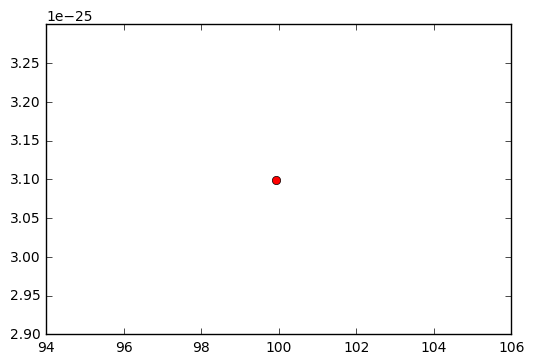

In [59]:
plt.plot(df.Hm2,df['BRmuegamma'],'ro')

In [27]:
%pycat hep.py

Intro Pandas

DataFrame

In [35]:
SS=pd.DataFrame({'A':[1,2],'B':[4,3]})
SS

A  B
0  1  4
1  2  3

Series

In [41]:
SS.loc[1]

A    2
B    3
Name: 1, dtype: int64

In [40]:
type(SS.loc[1])

pandas.core.series.Series

Diccionario

In [58]:
a.Series.keys().values

array(['GFFermiconstant', 'Zbosonpolemass', 'alphasMZSMMSbar',
       'mbmbSMMSbar', 'mtaupole', 'mtoppole', 'Mh', 'Mu', 'lambda1',
       'lambda10', 'lambda2', 'lambda3', 'lambda4', 'lambda5', 'lambda6',
       'lambda7', 'lambda8', 'lambda9', 'lambdah', 'mEt2', 'epsD11',
       'epsD12', 'epsD13', 'epsD21', 'epsD22', 'epsD23', 'epsD31',
       'epsD32', 'epsD33', 'epsE11', 'epsE12', 'epsE13', 'epsE21',
       'epsE22', 'epsE23', 'epsE31', 'epsE32', 'epsE33', 'epsU11',
       'epsU12', 'epsU13', 'epsU21', 'epsU22', 'epsU23', 'epsU31',
       'epsU32', 'epsU33', 'Yh11', 'Yh12', 'Yh13', 'Yh21', 'Yh22', 'Yh23',
       'Yh31', 'Yh32', 'Yh33', 'Fd1', 'Fd2', 'Fd3', 'Fe1', 'Fe2', 'Fe3',
       'Fu1', 'Fu2', 'Fu3', 'Fv1', 'Fv2', 'Fv3', 'Hm2', 'Hm3', 'VWp', 'VZ',
       'etI', 'hh1', 'hh2', 'hh_2 ->  GLUE GLUE', 'hh_2 ->  TAU+ E-',
       'hh_2 ->  CBAR U', 'hh_2 ->  BBAR B', 'hh_2 ->  CBAR T',
       'hh_2 ->  W+ W-', 'hh_2 ->  TBAR C', 'hh_2 ->  MU+ MU-',
       'hh_2 ->  UBAR T', 'hh_2 -> 